### IMPORT LIBRARY

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

###
### MEMBACA DAN MENAMPILKAN CITRA ASLI

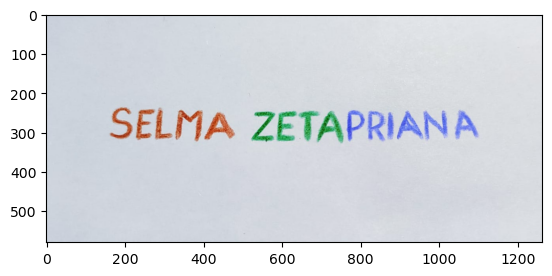

In [4]:
img = cv.imread("Citra Nama.jpg")

plt.imshow(img)

###
### KONVERSI RGB KE BGR

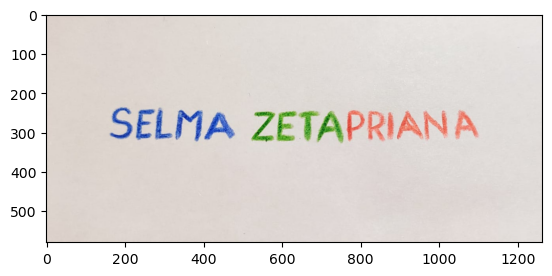

In [6]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(rgb)

### 
### 1. DETEKSI WARNA PADA CITRA SERTA HISTOGRAM

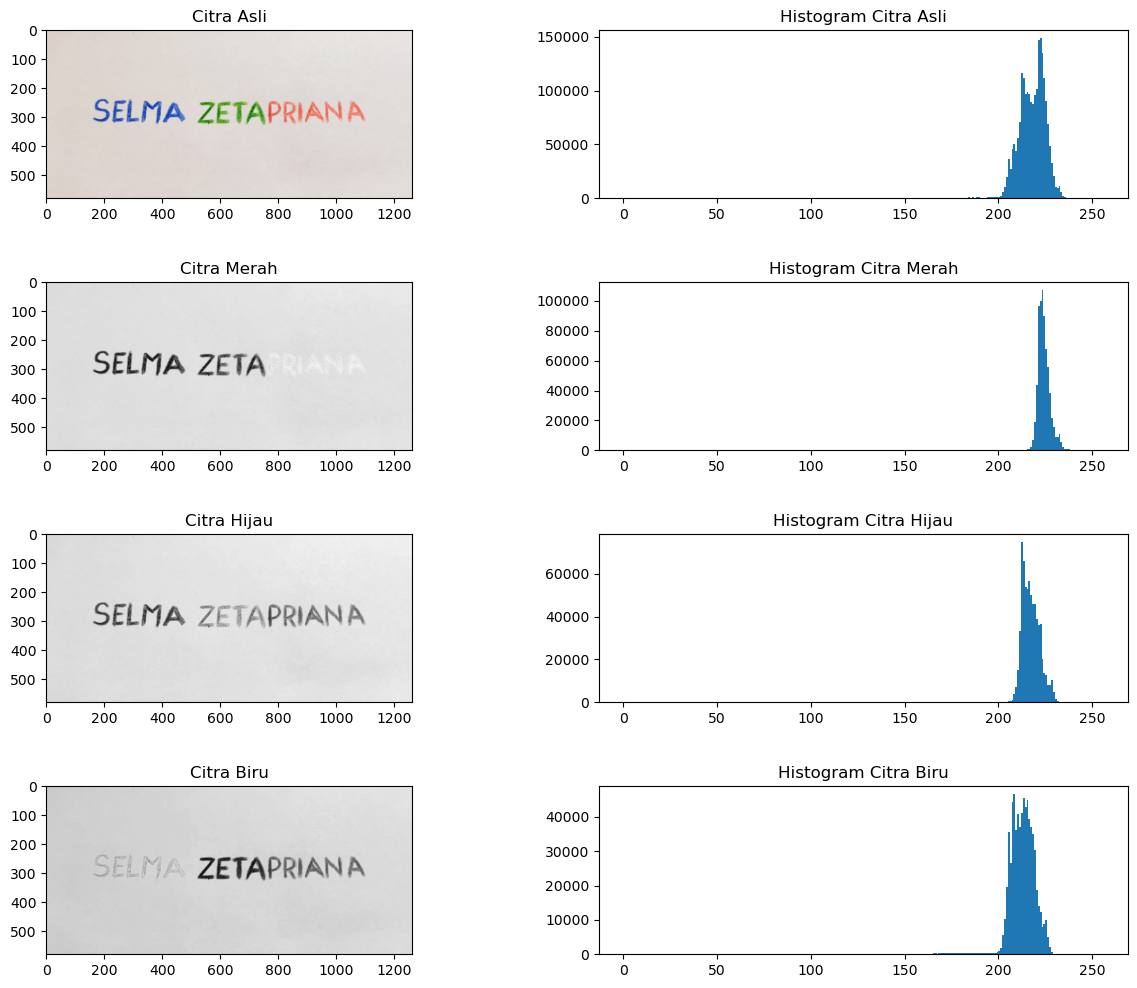

In [8]:
fig, axs = plt.subplots(4,2, figsize=(15,12))

#citra asli
citra1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
axs[0,0].imshow(citra1)
axs[0,0].set_title('Citra Asli')
axs[0,1].hist(citra1.ravel(),256,[0,256])
axs[0,1].set_title('Histogram Citra Asli')

#channel merah
citraMerah = citra1[:, :, 0]
axs[1,0].imshow(citraMerah, cmap="gray")
axs[1,0].set_title('Citra Merah')
axs[1,1].hist(citraMerah.ravel(),256,[0,256])
axs[1,1].set_title('Histogram Citra Merah')

#channel hijau
citraHijau = citra1[:, :, 1]
axs[2,0].imshow(citraHijau, cmap="gray")
axs[2,0].set_title('Citra Hijau')
axs[2,1].hist(citraHijau.ravel(),256,[0,256])
axs[2,1].set_title('Histogram Citra Hijau')

#channel biru 
citraBiru = citra1[:, :, 2]
axs[3,0].imshow(citraBiru, cmap="gray")
axs[3,0].set_title('Citra Biru')
axs[3,1].hist(citraBiru.ravel(),256,[0,256])
axs[3,1].set_title('Histogram Citra Biru')

plt.subplots_adjust(hspace=0.5)
plt.show()

###
### 2. AMBANG BATAS (THRESHOLD)

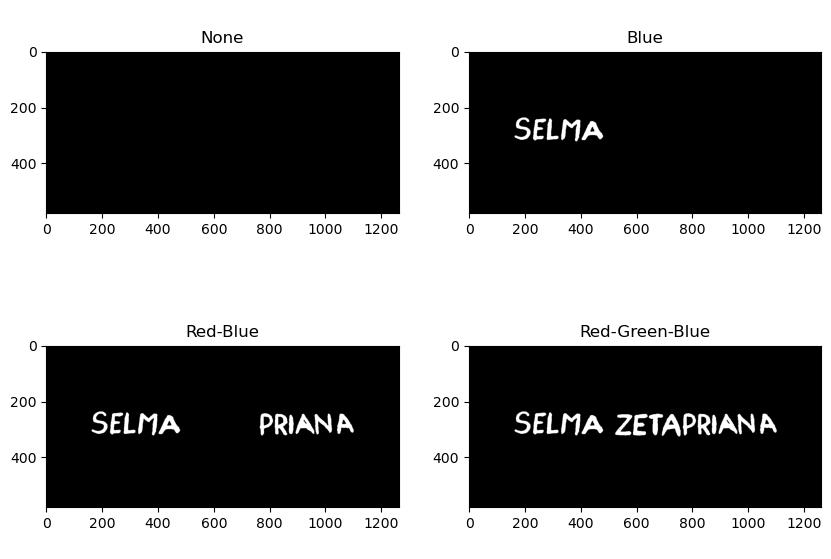

In [10]:
image_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10,7))

red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50]) 
red_upper2 = np.array([180, 255, 255])

green_lower = np.array([36, 50, 50])
green_upper = np.array([86, 255, 255])

blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])

mask_red1 = cv.inRange(image_hsv, red_lower1, red_upper1)
mask_red2 = cv.inRange(image_hsv, red_lower2, red_upper2)
mask_red = cv.bitwise_or(mask_red1, mask_red2) #untuk kombinasi mask
mask_green = cv.inRange(image_hsv, green_lower, green_upper)
mask_blue = cv.inRange(image_hsv, blue_lower, blue_upper)

combined_mask1 = np.bitwise_or(mask_red, mask_blue)
combined_mask2 = np.bitwise_or(combined_mask1, mask_green)

(thresh, binary1) = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('None')

plt.subplot(1, 3, 1)
axs[0,1].imshow(mask_blue, cmap='gray')
axs[0,1].set_title('Blue')
plt.axis('off')

plt.subplot(1, 3, 2)
axs[1,0].imshow(combined_mask1, cmap='gray')
axs[1,0].set_title('Red-Blue')
plt.axis('off')

plt.subplot(1, 3, 3)
axs[1,1].imshow(combined_mask2, cmap='gray')
axs[1,1].set_title('Red-Green-Blue')
plt.axis('off')

plt.show()

###
###
### 3. MEMPERBAIKI GAMBAR BACKLIGHT

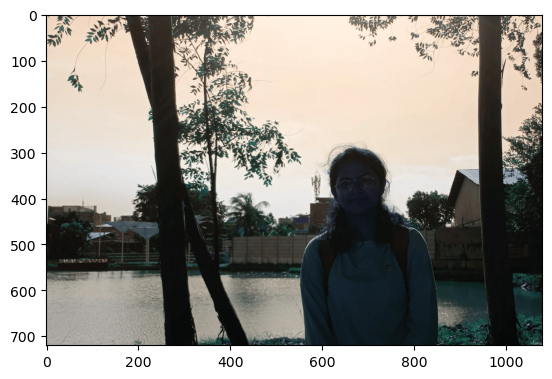

In [12]:
img2 = cv.imread("Backlight.png")

plt.imshow(img2)

###
### RGB TO BGR

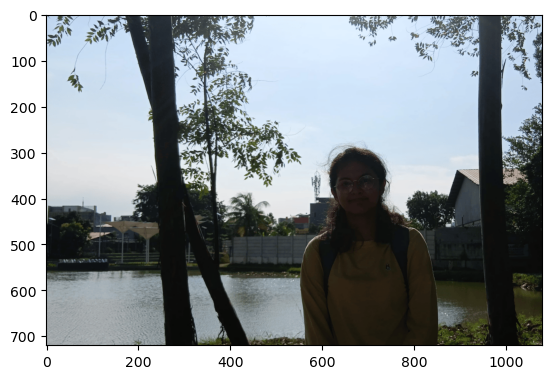

In [14]:
img2rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

plt.imshow(img2rgb)

###
### BGR TO GRAYSCALE

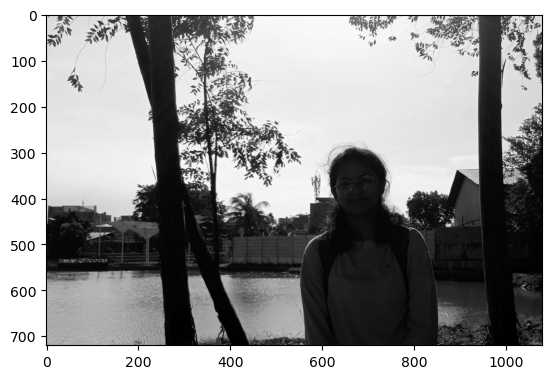

In [16]:
img2gray = cv.cvtColor(img2rgb, cv.COLOR_RGB2GRAY)

plt.imshow(img2gray, cmap='gray')

In [17]:
(baris, kolom) = img2.shape[:2]

###
### GAMBAR GRAY YANG DIPERKONTRAS

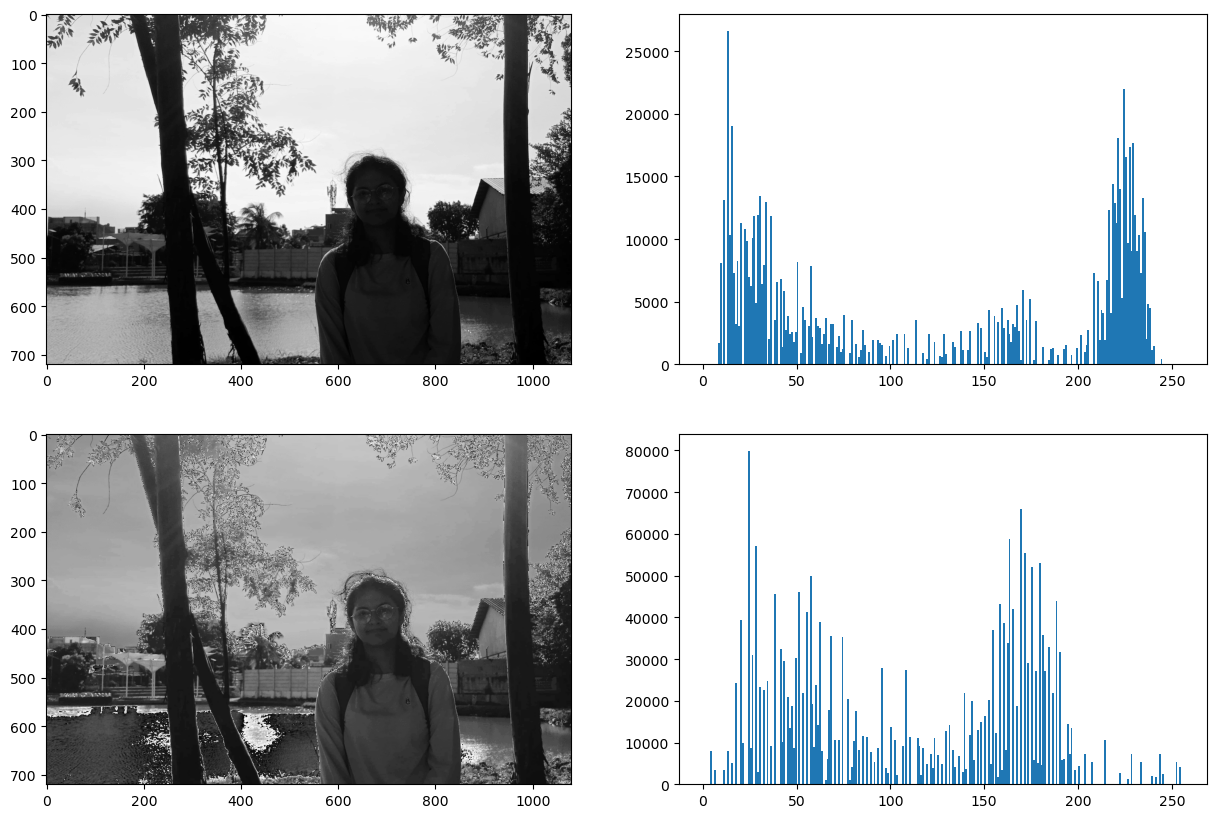

In [19]:
alpha = 1.9
citra_kontras = np.zeros((baris,kolom,3))

for x in range(baris):
    for y in range(kolom):
        gmx = img2gray[x,y] * alpha
        citra_kontras[x,y] = gmx

citra_kontras = citra_kontras.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0,0].imshow(img2gray, cmap='gray')
axs[0,1].hist(img2gray.ravel(),256,[0,256])
axs[1,0].imshow(citra_kontras, cmap='gray')
axs[1,1].hist(citra_kontras.ravel(),256,[0,256])
plt.show()

### GAMBAR GRAY YANG DIPERCERAH

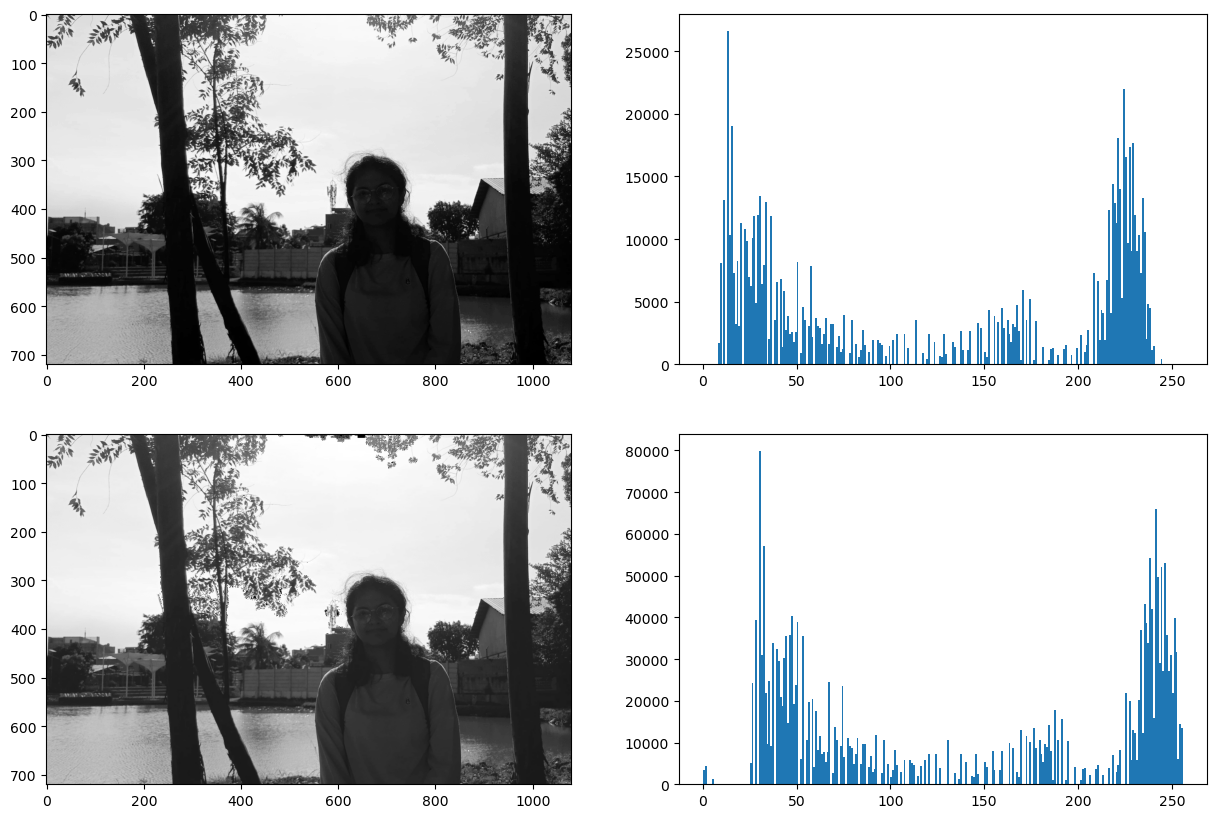

In [21]:
beta = 17
citra_cerah = np.zeros((baris,kolom,3))

for x in range(baris):
    for y in range(kolom):
        gyx = img2gray[x,y] + beta
        citra_cerah[x,y] = gyx

citra_cerah = citra_cerah.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize =(15,10))
axs[0,0].imshow(img2gray, cmap='gray')
axs[0,1].hist(img2gray.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah, cmap='gray')
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

###
### PERBANDINGAN CITRA SEBELUM DAN SESUDAH DIPERBAIKI

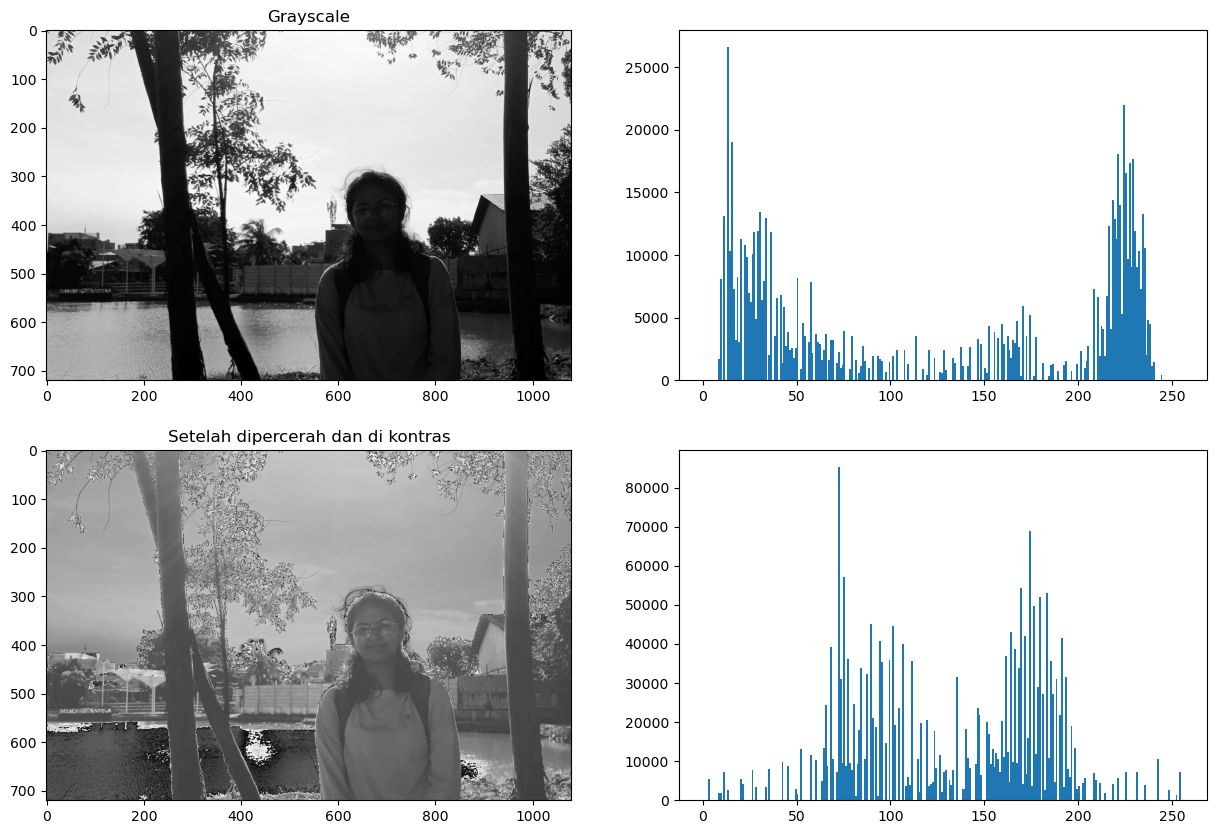

In [23]:
beta = 50
alpha = 1.7
img_hasil = np.zeros((baris,kolom,3))

for x in range(baris):
    for y in range(kolom):
        gcx = alpha * img2gray[x,y] + beta
        img_hasil[x,y] = gcx

img_hasil = img_hasil.astype(np.uint8)

fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0,0].imshow(img2gray,cmap='gray')
axs[0,0].set_title('Grayscale')
axs[0,1].hist(img2gray.ravel(),256,[0,256])
axs[1,0].imshow(img_hasil,cmap='gray')
axs[1,0].set_title('Setelah dipercerah dan di kontras')
axs[1,1].hist(img_hasil.ravel(),256,[0,256])
plt.show()

###
### ALL IN ONE DENGAN HISTOGRAM

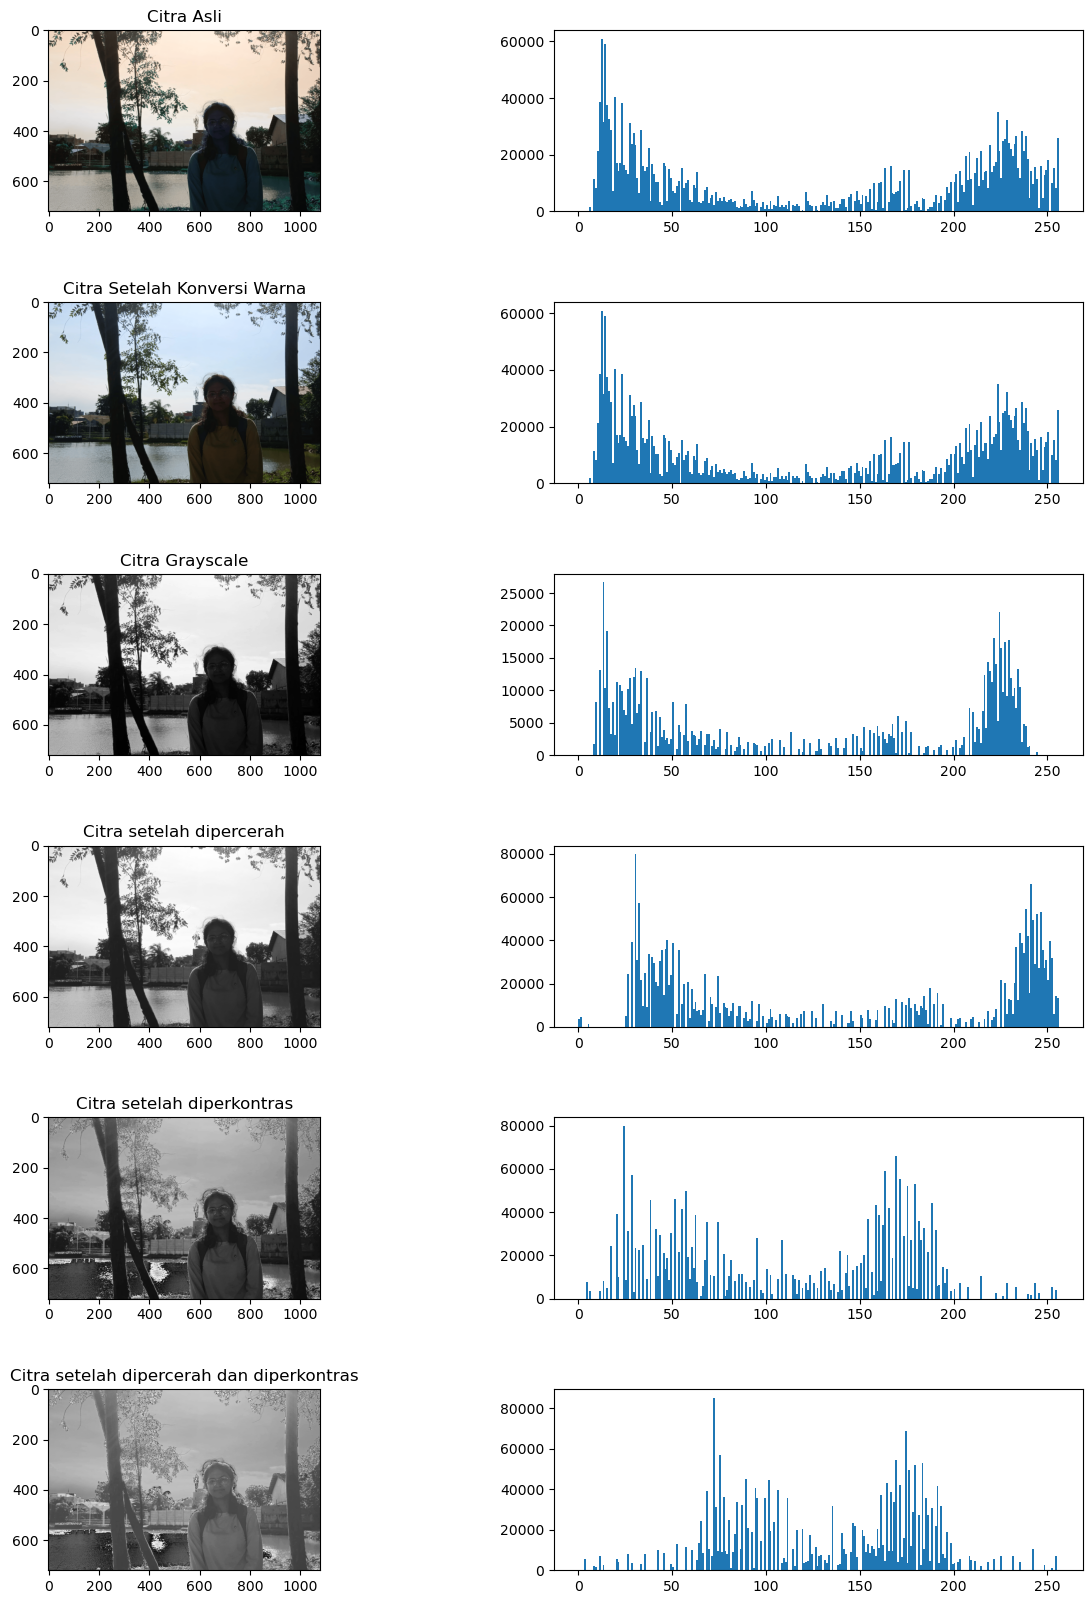

In [25]:
fig, axs = plt.subplots(6,2, figsize=(15,20))

axs[0,0].imshow(img2)
axs[0,0].set_title('Citra Asli')
axs[0,1].hist(img2.ravel(),256,[0,256])

axs[1,0].imshow(img2rgb)
axs[1,0].set_title('Citra Setelah Konversi Warna')
axs[1,1].hist(img2rgb.ravel(),256,[0,256])

axs[2,0].imshow(img2gray, cmap='gray')
axs[2,0].set_title('Citra Grayscale')
axs[2,1].hist(img2gray.ravel(),256,[0,256])

axs[3,0].imshow(citra_cerah, cmap='gray')
axs[3,0].set_title('Citra setelah dipercerah')
axs[3,1].hist(citra_cerah.ravel(),256,[0,256])

axs[4,0].imshow(citra_kontras, cmap='gray')
axs[4,0].set_title('Citra setelah diperkontras')
axs[4,1].hist(citra_kontras.ravel(),256,[0,256])

axs[5,0].imshow(img_hasil, cmap='gray')
axs[5,0].set_title('Citra setelah dipercerah dan diperkontras')
axs[5,1].hist(img_hasil.ravel(),256,[0,256])

plt.subplots_adjust(hspace=0.5)
plt.show()